In [1]:
using Catalyst
using DifferentialEquations
using Plots
trimer = @reaction_network begin
    (k1,k2), A+B <--> AB
    (k1,k2), A+C <--> AC
    (k1,k2), B+C <--> BC
    (k3,k4), AB+C <--> ABC
    (k3,k4), AC+B <--> ABC
    (k3,k4), BC+A <--> ABC   
end
u0 = [:A => 100.0, :B => 100.0, :C => 100.0, :AB => 0.0,
 :BC => 0.0, :AC => 0.0, :ABC => 0.0] #concentration
tspan = (0., .1) #time span

#These params are for homorates
#deltaG -20

#using .reaction_network
#import reaction_networkb
trimer

Model ##ReactionSystem#231:
Unknowns (7): see unknowns(sys)
  A(t)
  B(t)
  AB(t)
  C(t)
  ⋮
Parameters (4): see parameters(sys)
  k1
  k2
  k3
  k4

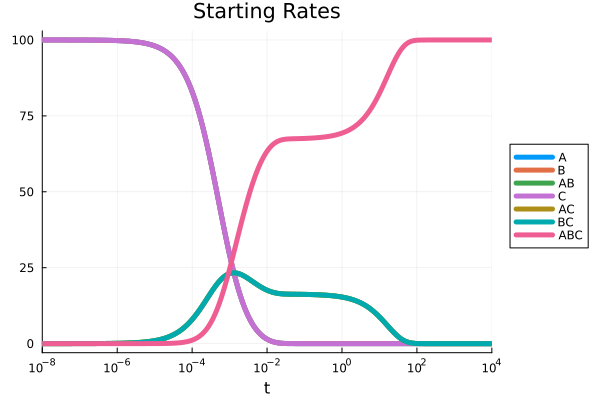

In [14]:
#Run simulation

params = Dict(:k1 => 10.0, :k2 => 0.02061153622438558, :k3 => 10.0, :k4 => 4.2483542552915886e-11)
ode = ODEProblem(trimer, u0, (.00000001,10000), params)#; jac = true) #Using the jacobian
sol = solve(ode,Rodas5P())
plot(sol,xaxis=:log; lw = 5,legend=:outerright,title="Starting Rates")

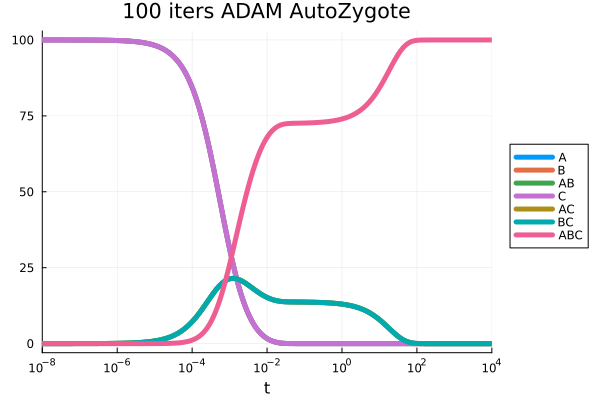

In [13]:
arr = Dict(:k1 => 8.993311612115827, :k2 => 0.01853659680703128, :k3 => 10.971600158580845, :k4 => 4.66112442210648e-11)
ode = ODEProblem(trimer, u0, (.00000001,10000), arr)#; jac = true) #Using the jacobian
sol = solve(ode,Rodas5P())
plot(sol,xaxis=:log; lw = 5,legend=:outerright,title="100 iters ADAM AutoZygote")

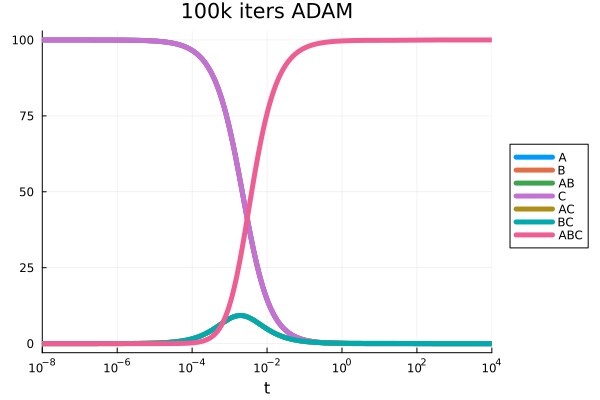

In [15]:
arr = Dict(:k1 => 1.733497402051894, :k2 => 0.0035730044497270905, :k3 => 9.999193874516529, :k4 => 4.2480117846287885e-11)
ode = ODEProblem(trimer, u0, (.00000001,10000), arr)#; jac = true) #Using the jacobian
sol = solve(ode,Rodas5P())
plot(sol,xaxis=:log; lw = 5,legend=:outerright,title="100k iters ADAM")

In [1]:
trimer

UndefVarError: UndefVarError: `trimer` not defined

In [ ]:
println(sol.u)

In [3]:
using Flux
forward_rates = [50.0,50.0]
lr = .01
sum(relu.((10*lr).-forward_rates)) + sum(relu.(forward_rates.-10)) 

80.0

In [78]:
t = default_t()
@parameters k[1:20]
@species A(t) B(t) C(t) D(t)
Reaction(k[1], nothing, [A])
print(typeof(k[1])," ",[A])

print(@species(eval("X$i") for i in 1:n))

Num Num[A(t)]

LoadError: LoadError: AssertionError: @variables expects a tuple of expressions or an expression of a tuple (`@variables x y z(t) v[1:3] w[1:2,1:4]` or `@variables x y z(t) v[1:3] w[1:2,1:4] k=1.0`)
in expression starting at /home/sho/KineticAssembly/KineticAssemblyJ/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X11sdnNjb2RlLXJlbW90ZQ==.jl:7

In [ ]:
using ModelingToolkit
using Catalyst
function get_fc_rn(n::Int)::ReactionSystem
    # Define monomer species
    monomers = [Symbol("X$i") for i in 1:n]
    species = copy(monomers)
    reactions = Reaction[]

    # Dictionary to keep track of complexes
    complex_map = Dict{}()
    for mon in monomers
        complex_map[Set([mon])] = mon
    end

    # Build complexes and reactions
    for m in 2:n
        new_complexes = []
        for (complex_set, complex_species) in complex_map
            if length(complex_set) == m - 1
                for mon in monomers
                    if !(mon in complex_set)
                        # Create new complex
                        new_complex_set = union(complex_set, [mon])
                        if !haskey(complex_map, new_complex_set)
                            # Define new species for the complex
                            new_complex_species = Symbol(join(sort([string(s) for s in new_complex_set])))
                            complex_map[new_complex_set] = new_complex_species
                            push!(species, new_complex_species)
                        else
                            new_complex_species = complex_map[new_complex_set]
                        end

                        # Define forward and reverse reactions
                        forward_reactants = [complex_species, mon]
                        forward_products = [new_complex_species]
                        reverse_reactants = [new_complex_species]
                        reverse_products = [complex_species, mon]
                        Reaction(Num("k"), nothing, [Num("Y")])
                        # Add reactions with rate constants kf and kr 
                        push!(reactions, Reaction(Symbol("k$(m)"), forward_reactants, forward_products))
                        push!(reactions, Reaction(Symbol("k$(m+1)"), reverse_reactants, reverse_products))

                        push!(new_complexes, new_complex_set)
                    end
                end
            end
        end
    end

    # Create the reaction network
    rn = ReactionSystem(reactions, species)
    return rn
end

# Example usage for a trimer (n = 3)
n = 3
trimer_network = get_fc_rn(n)
trimer_network

MethodError: MethodError: no method matching getmetadata(::String, ::Type{Catalyst.VariableSpecies}, ::Bool)

Closest candidates are:
  getmetadata(!Matched::SymbolicUtils.Symbolic, ::Any, ::Any)
   @ SymbolicUtils ~/.julia/packages/SymbolicUtils/jf8aQ/src/types.jl:658
  getmetadata(!Matched::Num, ::Any)
   @ Symbolics ~/.julia/packages/Symbolics/8MbnV/src/Symbolics.jl:188
  getmetadata(!Matched::Complex{Num}, ::Any)
   @ Symbolics ~/.julia/packages/Symbolics/8MbnV/src/Symbolics.jl:188
  ...
